In [6]:
import os
import cv2
from keras.models import load_model
import tensorflow as tf
from tensorflow import keras

In [7]:
model = tf.keras.models.load_model('mask_modle.h5')

#show the model architecture
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 98, 98, 200)       2000      
                                                                 
 activation_5 (Activation)   (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 200)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_6 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 100)       0         
 g2D)                                                 

The np.expand_dims) function in this context is used to adjust the shape of the grayscale image array to make it compatible with the expected input shape of a neural network.
Neural networks often expect input data to be in a certain shape or format. For image data, it commonly requires a 4D tensor where the dimensions represent: (batch_size, height, width, channels).
gray: Initially, it represents a 2D array containing pixel values of a grayscale image (height x width). np.expand _dims(gray, axis=0):
This function call adds an extra dimension at the beginning of the array (at index 0), effectively turning the 2D array into a 3D array.
After this operation, the shape of the array changes from (height, width) to (1, height, width). This extra dimension added at the beginning corresponds to the batch size, which is often used in neural networks to process multiple samples simultaneously.


1/1 [==============================] - 0s 196ms/step
pred = [[nan nan nan]]
0
[nan nan nan]
mask_weared_incorrect


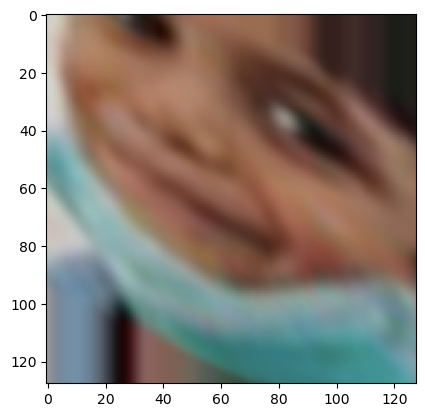

In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

h, w = 100, 100

img = image.load_img('49.png',target_size=(100,100,3))

imag = cv2.imread('49.png')

gray = cv2.cvtColor(np.float32(img),cv2.COLOR_BGR2GRAY)        #(100,100,1)

out = np.expand_dims(gray, axis=0)                            #(1,100,100,1)

final_img = out/255.0

pred = model.predict(final_img)
print('pred =',pred)

max_index=np.argmax(pred[0])

print(max_index)
emotions = ('mask_weared_incorrect','with_mask','without_mask')

predicted_emotion = emotions[max_index]
print(pred[0])

print(predicted_emotion)

plt.imshow(cv2.cvtColor(imag, cv2.COLOR_BGR2RGB))
#as opencv loads in BGR format by default,we want to show it in RGB
plt.show()